# E-K diagram using Kronig-Penny Model

<sub><sup>Submitted by: M Rifat Hossain (2018338062) </sup></sub>

The Kronig-Penney model is a simplified model for an electron in a one-dimensional periodic potential.

In [1]:
# Importing required packages

import numpy as np
import matplotlib.pyplot as plt

Let the periodic potential well has the following structure,

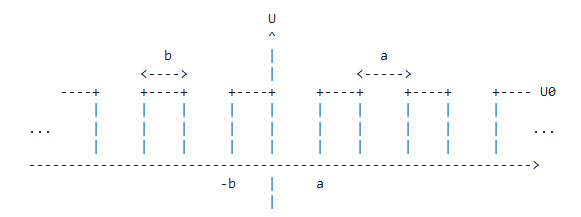

In [2]:
# Declaration of variables

U0 = float(input("Enter Barrier Height, U0 (eV): "))
a = float(input("Enter Well Width, a (Å): "))
b = float(input("Enter Barrier Width, b (Å): "))
n = int(input("Number of bands, n: "))
m = 9.1093837e-31           # kg
h_bar = 1.054571817e-34     # J*s
P = m*U0*1.602e-39*b*a/(h_bar**2)

print("P' =", P)

Enter Barrier Height, U0 (eV):  5
Enter Well Width, a (Å):  2.7
Enter Barrier Width, b (Å):  2.7
Number of bands, n:  3


P' = 4.78295966371244


In [3]:
# List operations

def Reverse(lst):
  new_lst = lst[::-1]
  return new_lst

def Neg_list(lst):
  new_lst = [-x for x in lst]
  return new_lst

From KP model we get,

${ P' sin(αa)  \over αa } + cos(αa) = cos(ka)$

Here,

$ P' = {m U0 b a \over ℏ^2}$

$ α = \sqrt{2mE \over ℏ^2} $

Let,
$ α = { x \over a }$ or, $ x = αa $

$f(x) = { P' sin(x)  \over x } + cos(x)$

So, $-1 <= f(x) <= 1 $

We will pick a range of $x$ and calculate $ f(x) $ for each value. Then we will do the following process where $f(x)$ meets our required condition

$ k = { cos^{-1}(f(x)) \over a }$

$ E = ({x \over aℏ})^2*{1 \over 2m}$

## Reduced k space

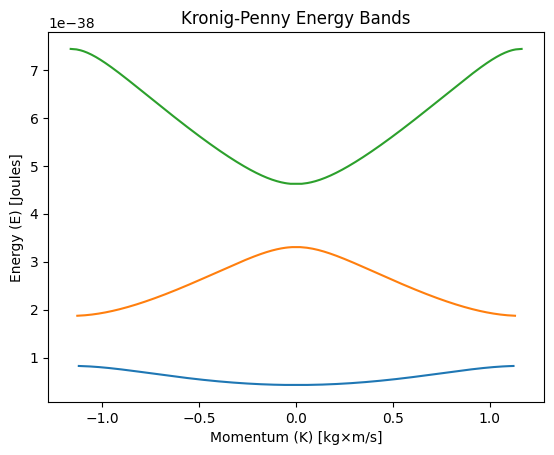

In [4]:
# EK

x = np.linspace(0,n*3.14159265,500*n)    # x = αa
i=0                                   # index of x array
while i < x.size:
  k = []
  E = []
  if x[i] == 0:
    x[i] += 1
    continue
  j = P*np.sin(x[i])/(x[i])+np.cos(x[i]) # From KP Model
  while j <= 1 and j >= -1:           # the condition that equates LHS and RHS
    k.append(np.arccos(j)/a)
    E.append((x[i]/a*h_bar)**2/(2*m))
    i += 1
    if i >= x.size:
      break
    j = P*np.sin(x[i])/(x[i])+np.cos(x[i])
  if len(k) > 0:                      # making symmetry
    if k[0] < k[-1]:
      k = Neg_list(Reverse(k)) + k
      E = Reverse(E) + E
    else:
      k = Neg_list(k) + Reverse(k)
      E = E + Reverse(E)
    plt.plot(k,E)
  i += 1
plt.title("Kronig-Penny Energy Bands")
plt.xlabel('Momentum (K) [kg×m/s]')
plt.ylabel('Energy (E) [Joules]')
plt.show()

## E-K diagram

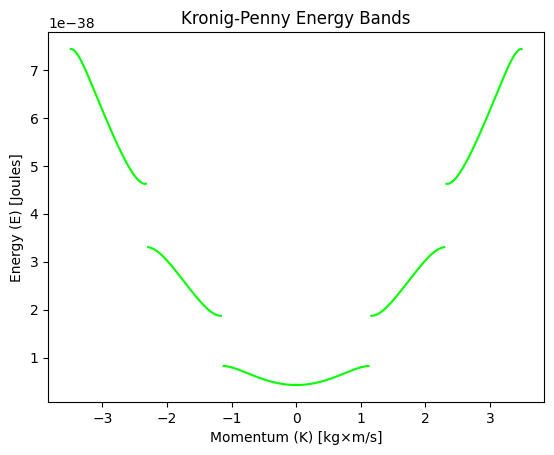

In [5]:
# EK

x = np.linspace(0,n*3.14159265,500*n)    # x = αa
i=0                                   # index of x array
eb = 0
while i < x.size:
  k = []
  E = []
  if x[i] == 0:
    x[i] += 1
    continue
  j = P*np.sin(x[i])/(x[i])+np.cos(x[i]) # From KP Model
  while j <= 1 and j >= -1:           # the condition that equates LHS and RHS
    if eb % 2:
      k.insert(0, eb * 3.14159265/a + np.arccos(j)/a)
    else:
      k.append(eb * 3.14159265/a + np.arccos(j)/a)
    E.append((x[i]/a*h_bar)**2/(2*m))
    i += 1
    if i >= x.size:
      break
    j = P*np.sin(x[i])/(x[i])+np.cos(x[i])
  if len(k) > 0:                      # making symmetry
    k.insert(0,eb * 3.14159265/a)      # gap filling
    E.insert(0,E[0])                  # gap filling
    plt.plot(k,E,color=(0,1,0))
    plt.plot(Neg_list(k),E,color=(0,1,0))
    eb += 1
  i += 1
plt.title("Kronig-Penny Energy Bands")
plt.xlabel('Momentum (K) [kg×m/s]')
plt.ylabel('Energy (E) [Joules]')
plt.show()